# Matrices in Quantum Mechanics

In [1]:
# import all python add-ons etc that will be needed later on
%matplotlib inline
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sympy import *
init_printing()                      # allows printing of SymPy results in typeset maths format
plt.rcParams.update({'font.size': 14})  # set font size for plots

## 1 Concept and motivation

The Schroedinger equation (1) can be solved, in principle, by integration in the same manner as other similar differential equations and the energies $E$ and wavefunctions $\varphi$ determined,

$$\displaystyle \left(-\frac{\hbar^2}{2m}\frac{d^2}{dx^2}+V(x)\right)\varphi=E\varphi \qquad\tag{1}$$

where $\varphi$ is a function of $x$, although this is often not explicitly stated. Unfortunately an algebraic solution turns out to be possible only for a few potentials $V(x)$. Luckily, among these are the rather useful ones, the harmonic and Morse oscillator, the particle in a box or on a ring, the rigid rotor and the hydrogenic type atoms with a single electron. Flugge (1999) gives several more one dimensional examples. For other problems, for example, to predict an NMR spectrum or that of a non-rigid rotor the equation is solved by recasting it in a basis set and using the properties of eigenvalue - eigenvector matrices. This is in essence an algebraic method although numerical values can be calculated. The Schroedinger equation can also be solved numerically for an arbitrary potential, by using one of several integration methods; see Chapter 11. However, numerical integration does not easily lend itself to predicting trends and identifying important parameters and limits, which an algebraic solution does.

This chapter has two parts, the first assumes some knowledge of basis sets and several problems are solved using them and in the second part, basis sets and _bra-ket_ algebra are described. How these objects are manipulated is illustrated. If you are unfamiliar with these topics, it may be worth looking at the second part first.

## 1.1 Notation

Writing the Schroedinger equation as $H\varphi = E\varphi$ is the conventional shorthand that represents the following set of simultaneous equations

$$\displaystyle H^0\varphi_0=E_0\varphi_0, \qquad H^0\varphi_1=E_1\varphi_1, \qquad\cdots \qquad H^0\varphi_i=E_i\varphi_i\qquad\tag{2}$$

one for each of the possibly infinite number of energy levels. The superscript zero, e.g. $H^0$ indicates that this operator exactly solves the Schroedinger equation with wavefunctions $\varphi_i$. These wavefunctions $\varphi_i$ are orthogonal to one another because each describes an eigenstate of the particular potential used and are assumed to have been normalized. The orthonormality condition is 

$$\displaystyle \int\varphi_n^*\varphi_mdx=\delta_{n,m}$$

The superscript * represents the complex conjugate, which means that if the wavefunction is complex replace $i$ with $-i$ and vice versa. If it is not complex, i.e. 'normal' the complex conjugate changes nothing. In Dirac 'bra-ket' notation the orthogonality and normalization of the wavefunctions is written as 

$$\displaystyle \langle\varphi_n | \varphi_m \rangle = \delta_{n,m}$$

where $\delta$ is the Kronecker delta such that $\delta_{n,n} = \delta_{m,m} = 1$ and if $n \ne m$; $\delta=0$. The subscripts $i = 0, 1, 2, \cdots$ are used to label the whole set of energy levels but the subscripts $n$ and $m$ are reserved to represent individual levels should that be necessary and are also the quantum numbers. If the harmonic oscillator were being described, quantum number $i$ would extend to infinity. In contrast, spin only has a finite set of quantum numbers; two for the spin state of the electron $i = -1/2, 1/2$ and three for the nuclear spin state of $^{14}$N or $^2$H, $0, \pm 1$.

## 2 Expectation Values

The expectation or average value for the lowest level $0$ is the energy $E_0$. It is calculated by left multiplying equation 2 by $\varphi^*_0$ and integrating over all space $x$,

$$\displaystyle E_0=\frac{\int_{-\infty}^\infty \varphi_0^*H^0\varphi_0 dx}{\int_{-\infty}^\infty \varphi_0^*\varphi_0 dx} =\int_{-\infty}^\infty \varphi_0^*H^0\varphi_0 dx \qquad\tag{3}$$

and because the wavefunction is normalized, $\int_{-\infty}^\infty \varphi_0^*\varphi_0 dx=1$. The same procedure can be followed for every other level to calculate $E_n$. Any energy can be written in equivalent ways as

$$\displaystyle E_n=\int_{-\infty}^\infty \varphi_n^*H^0\varphi_n dx\equiv \langle \varphi_n^*|H^0|\varphi_n\rangle = \langle n|H^0|n\rangle \qquad\tag{4}$$

the latter two expressions being in Dirac's bra-ket notation, explained in Section 4 together with basis sets. Note that the bra $\langle \varphi^*_n|$ is always the complex conjugate of the wavefunction $\varphi$, but it is not common to label it as such, therefore the bra can be written as $\langle \varphi_n|$. The ket is $|\varphi_n\rangle$. In general, if $S$ is an operator, its expectation is

$$\displaystyle S_{n,n}=\int_{-\infty}^\infty \varphi_n^*S\varphi_n dx\equiv \langle \varphi_n^*|S|\varphi_n\rangle=\langle n|S|n\rangle \qquad\tag{5}$$

If the operator $S$ is position $x$, the expectation value is the average position, if momentum, whose operator is $-i\hbar (d/dx)$, then $S$ is the average momentum and so forth. When two different states $n$ and $m$ interact under the action of the operator $S$, the notation used is similar

$$\displaystyle S_{n,m}=\int_{-\infty}^\infty \varphi_n^*S\varphi_m dx\equiv \langle \varphi_n^*|S|\varphi_m\rangle=\langle n|S|m\rangle \qquad\tag{5}$$

Interactions between different levels $n$ and $m$ lead to interesting effects, and this chapter describes how these may be calculated. No interaction occurs if $S = H^0$ because $H^0$ exactly solves the Schroedinger equation with wavefunctions $\varphi_i$, which are orthogonal,

$$\displaystyle H_{nm}=\int \varphi_n^*H^0\varphi_mdx=E_0\int\varphi_n^*\varphi_mdx=0\qquad n\ne m\qquad\tag{7}$$

Expectation values are also called matrix elements and these are explained next. Suppose that the (quantum) harmonic oscillator is to be solved. The wavefunction is a function of position, the bond extension, and the operator is

$$\displaystyle H^0\equiv -\frac{\hbar^2}{2m}\frac{d^2}{dx^2}+V(x)$$

and, for the harmonic oscillator, $V(x) = kx^2/2$. To obtain the energy, $H^0$ operates on $\varphi(x)$, the result is then multiplied by $\varphi^*(x)$ and this result integrated. The matrix element describing the interaction of one state $n$ to another $m$ based on equation 6, has the form 

$$\displaystyle H_{nm} = \int\varphi^*_nH^\varphi_m dx$$

where $H_{nm}$ is an energy. Because the quantum numbers are discrete, a secular equation can be formed and eigenvalue - eigenvector methods used to solve for the energies. See Chapter 12 for the method. The general equation is

$$\displaystyle \pmb{Av}=\pmb{\lambda v}$$

where $\pmb{A}$ is a matrix, $\pmb{v}$ the eigenvectors and $\pmb{\lambda} $ the eigenvalues. In this context, the matrix $\pmb{A}$ is the matrix of expectation values $H_{nm}$, the eigenvector's elements are the wavefunctions $\varphi_n$ and eigenvalues $\lambda_n$ are the energies $E_n$. Rewriting in this way produces

$$\displaystyle \qquad\qquad\begin{bmatrix}H_{00} & H_{01} & H_{0,2} & \cdots \\H_{10} & H_{11} & H_{12}& \cdots  \\H_{20}&\vdots & \ddots &\cdots & \\ \vdots & \vdots & \vdots & H_{nn}\\ \end{bmatrix} \begin{bmatrix}\varphi_0 \\\varphi_2\\ \vdots \\ \varphi_n \end{bmatrix}=\begin{bmatrix}E_0\\E_1\\ \vdots \\E_n \end{bmatrix}\begin{bmatrix}\varphi_0 \\\varphi_2\\ \vdots \\ \varphi_n \end{bmatrix} \qquad\qquad\qquad\qquad\text{(8)}$$

but because each $\varphi$ is an exact solution to the Schroedinger equation the $\varphi$ are orthogonal to one another and all values that are non-diagonal with $n \ne m$ equation 7 are zero, giving

$$\displaystyle \qquad\qquad\begin{bmatrix}H_{00} &0 & 0 & \cdots \\0 & H_{11} & 0& \cdots  \\0&\vdots & \ddots &\cdots & \\ \vdots & \vdots & \vdots & H_{nn}\\ \end{bmatrix} \begin{bmatrix}\varphi_0 \\\varphi_2\\ \vdots \\ \varphi_n \end{bmatrix}=\begin{bmatrix}E_0\\E_1\\ \vdots \\E_n \end{bmatrix}\begin{bmatrix}\varphi_0 \\\varphi_2\\ \vdots \\ \varphi_n \end{bmatrix}\qquad\qquad\qquad\qquad \text{(9)}$$


and therefore a set of equations, such as 4 is obtained, one for each quantum number $n$. The matrix 9 is already diagonalized, therefore $E_0 = H_{00}, E_1 = H_{11}$, and so forth and these are the eigenvalues or energies. Clearly, to do any of these calculations the wavefunctions $\varphi$ have to be known.

The effect of using a different potential is calculated next. Hamiltonian $H$ has a new term in the potential energy, and this manifests itself as off-diagonal terms in the $H_{nm}$ matrix equation 8. The hamiltonian can be written as

$$\displaystyle H= -\frac{\hbar^2}{2m}\frac{d^2}{dx^2}+V^1(x)$$

where $V^1$ is the new potential. Each integral $H_{nm}=\int\varphi^*_nH\varphi_m dx$ has to be solved first and the new matrix diagonalised. In some problems, such as the NMR nuclear spin example given below, the wavefunctions are never known, only their integrals with the angular momentum operator, which means that $H_{nm}$ is known directly. In problems that have a large number of states, such as an anharmonic oscillator, a huge matrix will be needed to calculate accurate values of the energies because there are many non-zero, off-diagonal terms. In this case, the larger the matrix is, the more accurate the answers become, provided numerical accuracy can be maintained. In examples involving electron or nuclear spin, the matrix has a finite size that completely determines the problem, and accurate results are obtained from small matrices. 

## 2.1 The effect of new potential energy. Expanding in a basis set.

The energies and wavefunctions of the harmonic oscillator are well known, the Hamiltonian is

$$\displaystyle H^0= -\frac{\hbar^2}{2m}\frac{d^2}{dx^2}+\frac{1}{2}kx^2\equiv H^k+V$$

Suppose that to make the potential more like that of a real molecule, a term $V^1$ replaces the potential energy making it quartic, i.e. $V^1 = k'x^4/2$, but any similar potential, such as the Morse potential, could be used. The harmonic oscillator wavefunctions $\varphi$ would no longer be 'diagonal in the eigenstates' meaning that the wavefunctions $\varphi$ that are solutions with $H^0$ are not solutions of the Schroedinger equation with the new potential. With the new potential, some, if not all of the off-diagonal expectation values (matrix elements) $H_{23}, H_{53}$ for example will no longer be zero. The new energies are no longer given by the diagonal elements of the matrix but by an equation of the form of equation 8, which has to be diagonalized.

The wavefunctions of the quartic oscillator will be labelled $\psi$, however, the Schroedinger equation cannot yet be solved with this potential because the equation $H_{nm} = \int \psi^*_nH\psi_mdx$ cannot be worked out because the $\psi$ are unknown. One solution to this problem is to solve the Schroedinger equation with the quartic potential, $V^1$, using the harmonic wavefunctions $\varphi$ as a basis, and so obtain the quartic eigenvalues (energies) and eigenvectors in terms of these $\varphi$. The eigenvectors $v$ are used to _expand_ the unknown wavefunctions $\psi$ in terms of the known ones $\varphi$. A basis set to describe the new wavefunctions has to be constructed. This basis set has to be orthogonal and although it does not need be normalized, it is usually easier to use if it is. A basis set is used because _any_ vector can be described as a _linear combination of basis vectors_ (Chapter 6) and it is proposed that any wavefunction can be described as a weighted sum of basis wavefunctions. The basis set used is the set of harmonic oscillator wavefunctions (eigenvectors) $\varphi$ which solve the equation $H^0\varphi = E\varphi$. The new wavefunctions then have the form

$$\displaystyle \psi=a_1\varphi_1 +a_2\varphi_2 +a_3\varphi_3 +\cdots \qquad\tag{10}$$

where $a_1, a_2$ and so forth, are the amounts of each $\varphi$ needed to make the $\psi$ that solves -  which means, will diagonalize - the Schroedinger equation $(H^k + V^1)\psi = E\psi$. As there are
many levels $0 \to n$, each $\psi$ has its own expansion and there are, therefore, $n^2$ coefficients in
total. Each wavefunction has its own set of coefficients and it is better to give them two
subscripts and label the coefficients $v_{1k}, v_{2k}, \cdots$ as they are elements of the $k^{th}$ (column) eigenvector of the matrix of $v$'s. The $k^{th}$ of a total of $n$ wavefunctions is

$$\displaystyle \psi_k = v_{1k}\varphi_1 + v_{2k}\varphi_2 + \cdots + v_{nk}\varphi_n \qquad\tag{11}$$ 

The columns of eigenvectors are calculated as the eigenvalue-eigenvector equation 8 is solved.


## Summary of the method

**(i)**$\quad$ The wavefunctions $\psi$ are the solutions to Schroedinger's equation with Hamiltonian $H + V^1$, and $\varphi$ is the exact wavefunction to a simpler problem with Hamiltonian $H^0$, such as the harmonic oscillator or particle in a box. A linear combination of these known wavefunctions is is made to find $\psi$.

**(ii)**$\quad$ The $\varphi$ are orthogonal to one another; to form the complete basis set they must be and it is simpler to start with each $\varphi$ normalized.

**(iii)**$\quad$ If the number of levels is infinite then clearly the calculation cannot be completed exactly. In this case, the $\psi$ and the corresponding energies are approximate but improve as more energy levels are added. This improvement occurs because the energy levels are coupled one to another and including more of them allow more couplings to be added.

**(iv)**$\quad$ If the number of levels is finite as in spin problems such as NMR, then the result is exact.

**(v)**$\quad$ A basis set of any orthogonal set of functions could be chosen for the functions $\varphi$ as shown in the generalized Fourier method, Chapter 9.4. However, it is natural to try to choose a set of basis functions that have a similar shape to those the new wavefunctions are expected to look like. A good guess will make the off-diagonal terms relatively small, and when diagonalized, which has the effect of mixing all the matrix elements together, the resulting diagonal terms will only be slightly different from the un-diagonalized ones.

**(vi)**$\quad$ This is not a perturbation method; the more terms that are added, the more accurate the result becomes.
_________

Returning to the quartic oscillator, using the basis set wavefunctions $\varphi$ the matrix of the eigenvalue equation now has the form

$$\displaystyle \qquad\qquad\begin{align} &\text{ordering of basis set} \to \\& \qquad b_1\; \quad b_2 \;\quad b_3 \cdots \\ &\begin{matrix} b_1\\b_2\\b_3\\ \vdots \end{matrix} \begin{bmatrix}H_{00} & H_{01} & H_{0,2} & \cdots \\H_{10} & H_{11} & H_{12}& \cdots  \\H_{20}&\vdots & \ddots &\cdots & \\ \vdots & \vdots & \vdots & H_{nn}\\ \end{bmatrix} \end{align}\qquad\qquad\qquad\qquad\text{(12)}$$

where $b_1, b_2$ are only the _indices_ of the basis set; for the vibrational oscillator they are labelled $1, 2, 3, 4, \cdots$. The matrix elements, the integrals $H_{01}, H_{32}$, etc. are in the form of equations 5 and 6. The basis set indices can be put in any order but this must be the same in each row and column. To simplify the calculation, the Hamiltonian operator is split into $H$ and a potential term $H^1$, as

$$\displaystyle H = H^0 + H^1\qquad\tag{13}$$

and $H^1 = V^1 = k'x^4/2$ if the new potential were quartic. 

The matrix elements formed in the new basis set have the form

$$\displaystyle H_{nm}=\int \varphi^*_nH\varphi_m dx=\int \varphi^*_nH^0\varphi_m dx+\int \varphi^*_nH^1\varphi_m dx=\int \varphi^*_nH^1\varphi_m dx$$

which is not necessarily zero because the operator has been changed to $H^1$. Notice that the wavefunctions are $\varphi_n, \varphi_m$ and are those of the chosen basis set and not the wavefunctions $\psi$ that will solve the new Schroedinger equation; these are not known yet.

Diagonalizing the matrix produces the eigenvalues that are the energies. The eigenvectors $\pmb{v}$ are also obtained and from these the wavefunctions that approximate to the true ones can be calculated using equation 11. Eigenvectors are usually formed into a matrix; each column is the eigenvector $\pmb{v}$ for a wavefunction and the order of the columns is the same as the order of the eigenvalues. This means that if $v_1, v_2, v_3$ are the first three entries for the _column_ eigenvector of eigenvalue 1, then the wavefunction is

$$\displaystyle \psi_1 \approx v_{11}\varphi_1 + v_{21}\varphi_2 + \cdots + v_{n1}\varphi_n$$

and $\approx$ is used as the basis set is finite so this is an approximation, albeit a very good one, if an accurate calculation has been performed with a sufficiently large basis set. The second wavefunction might be $ \psi_2 \approx v_{12}\varphi_1 + v_{22}\varphi_2 +\cdots + v_{n2}\varphi_n$ where the $n$'s are the elements of the second column of eigenvectors.

Finally, note that this matrix/basis set method is an entirely different approach to solving the Schroedinger equation compared to other numerical methods. In those methods (see chapter 10) the equation is solved on a large grid of points using recursive equations that approximate the integral. In the matrix method, the amounts of each of the basis wavefunctions only are calculated. A grid of points is needed only to plot the wavefunction not to do numerical calculation.

Although the example described is a harmonic oscillator becoming a quartic oscillator, it is simpler mathematically as an illustration of this method, to calculate the vibrational energy levels and wavefunctions of a harmonic oscillator, using the values for the HCl molecule and the basis set of the 'particle in a box' wavefunctions. The length of the box will be $L$, where (arbitrarily) $L/2 = 0.128$ nm, the HCl bond length. The reduced mass $\mu= 35/36\cdot 10^{-27}$ kg, and force constant $k=516$ N/m. The Schroedinger equation is $H\psi=E\psi$ where 

$$\displaystyle H =-\frac{\hbar^2}{2\mu}\frac{d^2}{dx^2}+\frac{1}{2}kx^2$$

and the basis set $\varphi$ are solutions of $H^0\varphi=E^0\varphi$ where $\displaystyle H^0=-\frac{\hbar^2}{2\mu}\frac{d^2}{dx^2}$ because the potential is zero for a particle in a box. The extra potential in the harmonic oscillator is $H^1=kx^2/2$

The particle in a box wavefunctions are sine functions and are similar in shape to the wavefunctions of the harmonic oscillator, which oscillate in a sort of damped sinusoidal manner. Gaussian functions $e^{-\alpha (x-x_i)^2}$ might also do quite well, if one were displaced from another by an amount $x_i$, and positioned along the bond extension of the molecule. Choosing $\exp(-\alpha x)$ as the basis functions with different $\alpha$ would be a poor choice since adding exponential functions to make an oscillating wavefunction is always going to be difficult. Note that, although we use single functions as the basis set, each element could be several functions added together; you can decide what you want to do, but the basis set functions must be made orthogonal. The Gram - Schmidt method (Arkfen 1970) can be used to do this.

The chosen basis set is the set of 'particle in a box' wavefunctions which are

$$\displaystyle \varphi_n = \sqrt{\frac{2}{L}}\sin\left(n\pi\frac{x}{L} \right) \qquad\tag{14}$$

with $n = 1, 2, 3, \cdots$ and are defined over the range $0 \to L$, and are zero elsewhere. These wavefunctions are normalized and orthogonal, the first few members of the basis set are 

$$\displaystyle [\sqrt{\frac{2}{L}}\sin\left(\pi\frac{x}{L} \right),\sqrt{\frac{2}{L}}\sin\left(2\pi\frac{x}{L} \right),\sqrt{\frac{2}{L}}\sin\left(3\pi\frac{x}{L} \right),\cdots]$$

In practice $L$ has to be slightly larger than the bond length because of the way the harmonic potential widens as $n$ increases. The equilibrium extension is at $L/2$. The potential energy on this scale is $V^1(x) = k(x - L/2)^2/2$ where $k$ is the bond force constant and $x$ the extension about the equilibrium position, $L/2$.

## Summary of calculation

**(i)**$\quad$ Use the particle in a box wavefunctions to approximate the harmonic oscillator. The more of these wavefunctions that are added together to make $\psi$, the better is the approximation. The eigenvectors of the Hamiltonian matrix determine the amount of each ‘particle in a box’ wavefunction to add together; these are $v$'s of equation 11.

**(ii)**$\quad$ The expectation values (matrix elements) are formed into a matrix that will be diagonalized.

**(ii)**$\quad$ To form the matrix the order of the basis set is the same order as the elements in the matrix.

**(iv)**$\quad$ The wavefunctions $\varphi$, have indices $ 1, 2, 3,\cdots$, which form the order of the rows and columns. Element $H_{34} = \langle \varphi_3 | H | \varphi_4\rangle$  for example, appears at row 3 column 4 in the matrix. The matrix could be ordered with basis set elements as $3, 1, 2, 5, 4, 10, \cdots$ etc.; it would not make any difference as long as rows and columns are ordered in the same way and the matrix element entered at the correct position according to the indices. The ordering of the basis set and hence the matrix and corresponding quantum numbers is direct and is

Basis set index $ 0, 1, 2, 3, 4, 5, \cdots$  row/column order in matrix
 
Quantum number $1, 2, 3, 4, 5, \cdots$  (for particle in a box)

The basis set index is chosen to start at $0$ because python/numpy will be used to diagonalize the matrix and its indices start at 0. The particle in a box quantum numbers start at $1$.

## 2.2 Matrix elements

The individual matrix elements are $\langle n|H|m\rangle = \int \varphi^*_n H\varphi_mdx$ where 

$$\displaystyle \begin{align}\langle n|H|m\rangle&=\langle n|H^0|m\rangle+\langle n|H^1|m\rangle\\
&= \int_0^L\varphi^*_n\left(-\frac{\hbar^2}{2\mu}\frac{d^2}{dx^2}\varphi_m+\frac{k}{2}\left(x-\frac{L}{2}\right)^2\varphi_m \right)dx \\
&=-\frac{\hbar^2}{2\mu} \int_0^L\varphi^*_n\frac{d^2}{dx^2}\varphi_m dx +\frac{k}{2}\int_0^L\varphi^*_n\left(x-\frac{L}{2}\right)^2\varphi_m dx \end{align}\qquad\qquad\qquad\qquad\text{(15)}$$

where $\mu$ is the reduced mass and $n$ and $m$ the quantum numbers. This equation can be simplified because the basis set functions $\varphi$ are the known solutions to the particle in a box problem. In a particle in a box, the potential is everywhere zero except at $0$ and $L$, where it is infinite. In the first of the two integrals in equation 15, the diagonal terms, when $n = m$, have the values

$$\displaystyle \langle n|H^0|n\rangle=-\frac{\hbar^2}{2\mu} \int_0^L\varphi^*_n\frac{d^2}{dx^2}\varphi_n dx=\frac{\hbar^2}{2\mu}\left(\frac{n\pi}{L}\right)^2$$

With the same reasoning (and shown by direct calculation), when $n\ne m$ these integrals are all zero, they correspond to 'off-diagonal' terms in the matrix. 

The second integral is

$$\displaystyle \begin{align}\langle n|H^1|m\rangle&=\frac{k}{L}\int_0^L\left(x-\frac{L}{2}\right)^2\sin\left(n\pi\frac{x}{L}\right)^2 dx \\&=(n^2\pi^2-6)\frac{kL^2}{24n^2\pi^2}\end{align}$$

which gives the diagonal terms as 

$$\displaystyle \langle n|H|n\rangle=\frac{\hbar^2}{2\mu}\left(\frac{n\pi}{L}\right)^2+(n^2\pi^2-6)\frac{kL^2}{24n^2\pi^2}$$

and the off-diagonal terms remain as 

$$\displaystyle \frac{k}{2}\int_0^L\varphi^*_n\left(x-\frac{L}{2}\right)^2\varphi_m dx=\frac{2 L^{2} k m n \left(\left(-1\right)^{m} \left(-1\right)^{n} + 1\right)}{\pi^{2} \left(m - n\right)^{2} \left(m + n\right)^{2}}$$ 

and individual cases have be evaluated.

Using sympy to calculate these integrals gives

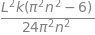

In [2]:
n, m = symbols('n, m', integer =True)
x,L,k = symbols('x,L,k')

psi_n = sin(n*pi*x/L)
psi_m = sin(m*pi*x/L)

Hnn=integrate((k/L)* psi_n**2*(x - L/2)**2, (x,0,L) , conds='none')
factor(Hnn)

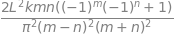

In [3]:
Hnm = integrate((k/L)* psi_n*psi_m*(x - L/2)**2, (x,0,L) , conds='none')
factor(Hnm)

___________
Constructing the matrix, equation 12, using results from these integrals, starting with $m=1;n=1$  and adding just a few of the terms produces

$$\displaystyle \small{\begin{bmatrix}\displaystyle  \frac{\hbar^2}{2\mu}\left(\frac{\pi}{L}\right)^2+(\pi^2-6)\frac{kL^2}{24\pi^2} & 0 & \displaystyle\frac{3k L^{2}}{16\pi^2} & 0  \\
0 &  \displaystyle  \frac{\hbar^2}{2\mu}\left(\frac{2\pi}{L}\right)^2+(4\pi^2-6)\frac{kL^2}{2^2\cdot 24\pi^2} & 0 & \displaystyle\frac{2k L^{2}}{3^2\pi^2}  \\ 
\displaystyle\frac{3k L^{2}}{16\pi^2} & 0 & \displaystyle  \frac{\hbar^2}{2\mu}\left(\frac{3\pi}{L}\right)^2+(3^2\pi^2-6)\frac{kL^2}{3^2\cdot 24\pi^2} & 0 \\
0 & \displaystyle\frac{2k L^{2}}{3^2\pi^2} & 0 & \displaystyle  \frac{\hbar^2}{2\mu}\left(\frac{4\pi}{L}\right)^2+(16\pi^2-6)\frac{kL^2}{4^2\cdot 24\pi^2} \end{bmatrix} }$$

Notice that the matrix is Hermitian, real, and symmetrical about the diagonal. The units of each term are the same and those of energy, i.e. joules. Although the matrix looks rather complicated, it can be split into two parts just as was done with $H$, equation 13. The first part contains the diagonal terms, the second the couplings between states introduced by the new potential energy terms,

$$\displaystyle \frac{\hbar^2}{2\mu} \begin{bmatrix}\displaystyle\left(\frac{\pi}{L}\right)^2 & 0 & 0 &\cdots\\ 0 & \displaystyle\left(\frac{2\pi}{L}\right)^2 & 0& \cdots \\ \vdots & \vdots & & \\ \end{bmatrix} + k\left(\frac{L}{\pi}\right)^2  \begin{bmatrix}\displaystyle\frac{6-\pi^2}{24} & 0 & \displaystyle\frac{3}{16} & 0 & \cdots \\ 0 & \displaystyle\frac{6-4\pi^2}{2^2\cdot 24} & 0 & \displaystyle\frac{2}{9}\\ \displaystyle\frac{3}{16}& 0 &\displaystyle\frac{6-9\pi^2}{3^2\cdot 24} \end{bmatrix} $$

Clearly a matrix as complex as this will not be easy to diagonalise algebraically, but in any case the equations produced are not of any great interest, where as the shape of the wavefunctions and energies are, thus a numerical approach is preferred.

The matrix is built first then the eigenvalues and eigenvectors calculated. The eigenvalues are sorted  so that each can be associated with its quantum number, since the energies increase in order with quantum number starting at zero.

In [4]:
# Algorithm Harmonic oscillator built from particle in a box wavefunctions

#-----------------------------------
def Hintegrals(n,m):
    n = n + 1                            # add 1 as python array index start at zero 
    m = m + 1
    if n == m:
        f01 = Hbarsq2m * piLsq * n**2
        f02 = (n**2*np.pi**2-6)*k/(24*n**2*piLsq)
        return f01 + f02
    else:
        return ( (2*k*n*m*(1 + (-1)**m *(-1)**n) )/ (piLsq*(n-m)**2*(n+m)**2) )    
#------------------------------------

hbar = 1.054e-34                    # J.s constants etc 
L    = 2*128.0e-12                  # m
mu   = 35/36*1.67e-27               # kg
k    = 516.0                        # N / m
num  = 45                           # size of matrix

Hbarsq2m =  hbar**2/(2*mu)          # constant for calculation
piLsq    = (np.pi/L)**2             # ""   ""

Hnm  = np.zeros( (num,num), dtype=float )

for n in range(num):
    for m in range(num):
        Hnm[n,m]= Hintegrals(n,m) 
        
vals,vecs = LA.eigh(Hnm)  

indx = np.argsort(vals)              # find index of sorted array
print('{:s} {:d}'.format('   n  matrix/J   exact/J. Matrix size = ',num))
for i in range(0,20,2):
    print('{:4d} {:8.4g}  {:8.4g}'.format(i, vals[indx[i]], hbar*np.sqrt(k/mu)*(i+1/2) )  ) # sorted energies

   n  matrix/J   exact/J. Matrix size =  45
   0 2.971e-20  2.971e-20
   2 1.485e-19  1.485e-19
   4 2.674e-19  2.674e-19
   6 3.862e-19  3.862e-19
   8 5.051e-19  5.051e-19
  10 6.239e-19  6.239e-19
  12 7.428e-19  7.427e-19
  14 8.624e-19  8.616e-19
  16 9.855e-19  9.804e-19
  18 1.118e-18  1.099e-18


The exact values are $E_n=\hbar\sqrt{k/\mu}(n+1/2)$ which is the normal equation fro the Harmonic oscillator. With a small matrix the calculated values are 

$$\begin{array}{ccc}
n  & \text{ matrix} \times 10^{20}{/ J}   &   \text{exact}\times 10^{20}{/ J}\\
   0  & 18.79 &  2.971\\
   1  & 51.44  & 8.913\\
   2  & 168.4  & 14.85\\
   3  & 204.6  &  20.8 \end{array}$$
   
but with a larger matrix $n=45$ much more accurate results are obtained, to $n=12$;
   
$$\begin{array}{ccc}
n  & \text{ matrix} \times 10^{20}{/ J}   &   \text{exact}\times 10^{20}{/ J}\\
   0  &  2.971 &   2.971\\
   2  &  14.85 &   14.85\\
   4  &  26.74 &   26.74\\
   6  &  38.62 &   38.62\\
   8  &  50.51 &   50.51\\
  10  &  62.39 &   62.39\\
  12  &  74.28 &   74.27\\
  14  &  86.24 &   86.16\\
  16  &  98.55 &   98.04\\
  18  &  111.8 &   109.9\\ \end{array}$$
  
Figure 1 shows the approximate wavefunctions built out of a particle in a box basis set using the procedure psi(qn,x)shown below. The wavefunction may be negative; this will depend on the sign of eigenvectors that are only defined to within $\pm 1$. Negative values are just as correct as positive ones. The wavefunction $\psi$ is constructed according to equation 11; the eigenvector values are the constants $v$. The wavefunctions are very close to the true ones as may be seen by looking at Figure 4.48 in the solutions. The reason that the match between the basis set expansion and the true values is better with a bigger basis set is because there are more sine functions and more variables $v$ to match to the harmonic oscillator wavefunctions. The same is true for a series expansion; the more terms the better the expansion will match the function. 

You may wish to try adding a quartic term to the quadratic potential, still using the particle in a box wavefunctions. The integrations will have to be recalculated using Maple, the 'force constant' $k_Q$ will have to be about $10^{24}$ in $k_Q(x - L/2)^4$, and at least $60$ terms will be needed in the matrix. The potential becomes steeper and therefore the energy levels are farther apart.

In [5]:
#-------------------
def psi(qn,x):      # calculating the wavefunction, note that (i+1) is used as the lowest valid 
                    # particle in a box quantum number is 1
    s = 0.0
    for i in range(num):
        s = s + vecs[i,indx[qn]]*np.sqrt(2/L)*np.sin((i+1)*np.pi*x/L )   # +1 as pib starts at 1   
    return s
#-------------------

![Drawing](matricesQm-fig1.png)

Figure 1. Approximate wavefunctions for $n = 0\to 8$ levels of HCl as a harmonic oscillator using the particle in a box basis set. The potential is also shown, and the energy is in units of $h\nu$ where $\nu$ is the transition frequency. The wavefunctions are scaled to a convenient amplitude for display and are essentially identical to those calculated using the equations derived directly from Schroedinger's equation, Fig. 48 in solutions to chapter 4.
__________

## 3 NMR spectrum with two spins

The pure nuclear Zeeman effect, which gives rise to the NMR spectrum will be calculated. In this calculation, and every other involving spin, the matrix element integrals $H_{nm}$ are evaluated directly from the properties of the angular momentum operators, and the spin wavefunctions can never be known. (Spin eigenfunctions unlike angular momentum do not depend on spatial coordinates; as a result, they do not have to satisfy a periodicity condition and can have half integer quantum numbers. Angular momentum, such as possessed by a rigid rotor molecule has integer quantum numbers.) 

NMR is extremely widely used in chemistry and biochemistry because the spectrum is a measure of the structure of the (diamagnetic) molecule. The many lines in the typical NMR spectrum have two main origins. One is caused by the local magnetic field of the molecule's electrons shielding the nuclei from the external field and is called the *chemical shift*. The other, $J$ coupling, is due to the local field caused by indirect _spin-spin_ or indirect _dipole - dipole_ interaction mediated by the electrons in the chemical bond. Because both effects are local this enables the structure to be determined. Generally, enough detailed information is generally present to allow this, but not so much that the spectrum is too complicated to be interpreted.

The Hamiltonian $S$ describing the interactions between $i$ nuclei in the strong external magnetic field $B$ and with the local induced fields, is,

$$\displaystyle S=-\frac{1}{\hbar}\sum_i\gamma_i(1-\sigma_i)\pmb{I}_i\cdot \pmb{B}+\frac{1}{\hbar^2}\sum_{i>j}\sum_j J_{ij}\pmb{I}_i\cdot \pmb{I}_j \qquad\tag{16}$$

The applied magnetic field is always in the z-direction with a magnitude $B_0$ tesla, and is zero in other directions. $\pmb{I}$ is the nuclear spin angular momentum vector with components in the $x$-, $y$-, and $z$-directions of $I_x, I_y$, and $I_z$ respectively. Angular momentum has the same units as $\hbar$; J s rad$^{-1}$. The constant $\gamma$ is the magnetogyric ratio (rad T$^{-1}$ s$^{-1}$) of each atom $i, \sigma_i$
the shielding constant (dimensionless) leading to the chemical shift and $J_{ij}$ the spin-spin coupling constant (rad s$^{-1}$) between any two atoms $i$ and $j$.

Spin is described by two quantum numbers $s$ and $m_z$ and for protons $s = 1/2$ and $m_z = \pm 1/2$. The latter is the quantum number associated with the projection of the spin angular momentum on the unique z-axis. The magnetic field $B$ along the z-direction breaks the threefold degeneracy of the angular momentum by making it unique along $z$, but it remains degenerate in $x$ and $y$. From now on, and only for clarity, $m$ will replace $m_z$. The wavefunction is written symbolically as $\psi_{sm} \equiv |sm\rangle$ and the $s-m$ basis set will be used. This is a basis set made up of the spin wavefunctions but labelled with the two spin quantum numbers. As there are two spins, each with quantum numbers $s = 1/2; m_z = \pm 1/2$, this basis set has only four elements. It is described in detail shortly. The spin wavefunctions are, by definition, orthonormal, which means that in general for spin $j$ and $k$, the integral

$$\displaystyle \langle s_jm_j|s_km_k\rangle=\delta_{s_js_k}\delta_{m_jm_k}$$

where $\delta$ is the Kronecker delta, which is $1$ if the subscripts are the same, and $0$ otherwise. The subscripts are the quantum numbers of the two spins. As both spins are protons, $s_j = s_k = 1/2$, and each spin has an m quantum number that can be $\pm 1/2$. The wavefunction for a system of two spins labelled $a$ and $b$, is made up in the usual way as a basis set of (spin) wavefunctions $\psi$, multiplied by coefficients $c$;

$$\displaystyle \psi=\sum_{m_1}\sum_{m_2} c_{m_1m_2}\psi_a(s_1m_1)\psi_b(s_2m_2) \qquad\tag{17}$$

Because there are two spins, the expectation value integrals are the product of the spin wavefunctions and the operator. For example,

$$\displaystyle H_{12}= \langle \psi_a(s_1m_1)\psi_b(s_1m_1)|S|\psi_a(s_2m_2)\psi_b(s_2m_2)\rangle$$

is the first row and second column expectation value of the Hamiltonian matrix equation 12. In such equations, $S$ is the (spin) operator, $\psi_a$ and $\psi_b$ are the spin wavefunctions on atom $a$ and $b$ respectively, and $s$ and $m$ are the spin quantum numbers. The subscript numbers refer to the indices of the matrix and are also the indices of the basis set. The ordering used here is

$$\displaystyle (m_a,m_b)=(1/2,1/2)\quad(1/2,-1/2)\quad(1/2,1/2)\quad(-1/2,1/2)\quad(-1/2,-1/2)$$

and is shown in equation 24. The numbers $\pm 1/2$ are only *symbols*, $\alpha$ and $\beta$ or any other symbols could be used instead.

A clear notation is obviously of great help in this type of problem. Each nucleus is identified with subscript $a$ or $b$ and the position in the matrix with a number $1 \to 4$. The matrix element $H_{12}$ can be written with its indices alone; there is no need to write $\psi$,

$$\displaystyle H_{12}= \langle s_{a1}m_{a1}s_{b1}m_{b1} |S|s_{a2}m_{a2}s_{b2}m_{b2} \rangle $$

and furthermore, as the nuclear spin quantum number is the same on each nucleus, the
subscripts on quantum number s can be dropped in the calculation. This produces

$$\displaystyle H_{12}= \langle sm_{a1}sm_{b1} |S|sm_{a2}sm_{b2} \rangle $$

and is used from now on. The spin quantum number s should not be removed from the notation, as it is needed when the matrix elements are worked out. The matrix of expectation values has next to be constructed and diagonalized. To work out the expectation values, the interactions between two spins and between a spin and the external magnetic field have to be examined, equation (8.16). These calculations are done in the following steps.

**(i)**$\quad$ The spin angular momentum I can be treated as if it were a three-dimensional vector with components in the $x-, y-, z$ -directions. In the Hamiltonian $S$, the terms $\pmb{I}\cdot\pmb{B}$ and 

$$\displaystyle I_a\cdot I_b = I_{ax}I_{bx} + I_{ay}I_{by} + I_{az}I_{bz}$$

for spins $a$ and $b$ have to be evaluated. The magnetic field $B$ only has a $z$ component by definition, and in practice in the NMR machine, so that $\pmb{I}\cdot\pmb{B} = I_z B_0$

**(ii)**$\quad$ Decide on the $s-m$ basis set order and then fill out the Hamiltonian matrix; see equation 12.

**(iii)**$\quad$ Evaluate each of the elements of the $4 \times 4$ matrix using the operator equations given below, and calculate the energy levels algebraically by diagonalising. Python/Sympy will be used to do this.

**(iv)**$\quad$ The energy levels will be found in the limit that the spin-spin coupling $J$ is small compared to the chemical shift; this is called the AX limit.

The integrals between states with angular momentum operators are well known, and  can be rigorously derived using the properties of the spherical harmonic functions; see Atkins & Friedmann (1997) or Flygare (1978) for a derivation. The angular momentum operator is conventionally labelled $L$, and the operators are $L^2, L_x, L_y L_z$. The shorthand notation of labelling the states with their quantum numbers rather than with a symbol for the wavefunction and its associated quantum numbers is the convention. The operators have the following properties:

$$\displaystyle \begin{array}{lll}\\
\displaystyle \langle sm|L^2|sm\rangle =\hbar^2s(s+1) & & & &\text{(18)}\\
\displaystyle \langle sm+1|L_x|sm\rangle =\frac{\hbar}{2}\sqrt{s(s+1)-m(m+1) } & & & &\\
\displaystyle \langle sm-1|L_x|sm\rangle =\frac{\hbar}{2}\sqrt{s(s+1)-m(m-1) }& & & &\text{(19)}\\
\displaystyle \langle sm+1|L_y|sm\rangle =\frac{\hbar}{2i}\sqrt{s(s+1)-m(m+1) } \\
\displaystyle \langle sm+1|L_y|sm\rangle =-\frac{\hbar}{2i}\sqrt{s(s+1)-m(m-1) }& & & &\text{(20)}\\
\displaystyle \langle sm|L_z|sm\rangle =\hbar m & & & & \text{(21)} \end{array}$$

and all other combinations of $s$ and $m$ have zero valued integrals. Note that only states in which the m quantum number changes by $0,\pm1$  are not zero. It is assumed also that $sm$ refers to the same spin $a$ or $b$ on both sides of the bra-ket, if not the result is zero. The integral of the product of the wavefunctions is

$$ \displaystyle \langle sm_a |sm_a\rangle = \langle sm_b |sm_b\rangle = 1,\quad \langle sm_a |sm_b\rangle =\langle sm_b |sm_a\rangle = 0$$

which means that the wavefunctions are normalized and orthogonal. (The $L_x, L_y$ are derived from the raising and lowering operators, see Q11.)

In the particular situation of nuclear spin, the angular momentum is labelled $\pmb{I}$ and this will be used from now on. It is vital to realize that the spin operator $\pmb{I}_b$ only works on nucleus $b$, and $\pmb{I}_a$ only on nucleus $a$. The operator $\pmb{I}_b$ will therefore treat all the wavefunctions $sm_a$ as constants and *vice versa*. The calculation proceeds as follows:

**(i)** The summation in equation 16 is the double summation $\sum_{i=1}\sum_{j=1}J_{ij}\pmb{I}_i\cdot\pmb{I}_j$ with the restriction that $i>j$ for $i$ and $j=a,b$ .

$$\displaystyle \sum_{i=1}\sum_{j=1}J_{ij}\pmb{I}_i\cdot\pmb{I}_j=J_{aa}\pmb{I}_a\cdot\pmb{I}_a+J_{ab}\pmb{I}_a\cdot\pmb{I}_b+J_{ba}\pmb{I}_b\cdot\pmb{I}_a+J_{bb}\pmb{I}_b\cdot\pmb{I}_b$$

but only $J_{ba}\pmb{I}_b\cdot\pmb{I}_a$ remains when the restriction $i > j$ if $b > a$ is applied. The dot product is clearer when written in matrix form and is

$$ \displaystyle \pmb{I}_a\cdot\pmb{I}_b=\begin{bmatrix} I_{ax}\;I_{ay}\;I_{az}\end{bmatrix}\begin{bmatrix}I_{bx}\\I_{by}\\ I_{bz}\end{bmatrix}=I_{ax}I_{bz}+I_{ay}I_{by}+I_{az}I_{bz} $$

and this is the same result as $\pmb{I}_b\cdot\pmb{I}_a$ because operators with an $a$ subscript only act on spin $a$, and $\pmb{I}_b$ only on spin $b$, therefore, operating on wavefuntions in the order $I_{ax}I_{bx}$ produces the same result as operating $I_{bx} I_{ax}$.

**(ii)** Using this last result, equation 16 simplifies to

$$\displaystyle S=-\frac{q_aI_{az}}{\hbar} -\frac{q_bI_{bz} }{\hbar}+\frac{J}{\hbar^2}(I_{ax}I_{bz}+I_{ay}I_{by}+I_{az}I_{bz}) \qquad\tag{22}$$

with the abbreviation $q = \gamma (1 -\sigma)B_0$ for each nuclei $a$ and $b$. The first two terms contain only the $z$ component of the angular momentum, because the magnetic field of the NMR spectrometer points only in the z direction. Planck's constant is present in the equation to give $S$ units of radian s$^{-1}$, matrix elements are in radian s$^{-1}$ also. The magnetogyric ratio $\gamma$ has units of radian tesla$^{-1}$ s$^{-1}$ and $B_0$ has units of tesla, $\pmb{I}$ has the same units as $\hbar \equiv$ joule second radian$^{-1}$, and $\sigma$ is dimensionless. Overall the units of $S$ are rad s$^{-1}$ or angular frequency. The constant $J$ also has units of rad s$^{-1}$.

**(iii)** A basis set of four vectors can be used, however, the numbers are to be treated as symbols to represent the spin state; no arithmetic is done with them.

$$\displaystyle \left( \begin{bmatrix} s_a \\ m_a \\ s_b \\ m_b \end{bmatrix}\right)\equiv \left( \begin{bmatrix} 1/2\\1/2\\1/2\\1/2\end{bmatrix},\begin{bmatrix} 1/2\\-1/2\\1/2\\1/2\end{bmatrix},\begin{bmatrix} 1/2\\1/2\\1/2\\-1/2\end{bmatrix},\begin{bmatrix} 1/2\\-1/2\\1/2\\-1/2\end{bmatrix}\right)\qquad\qquad\qquad\qquad  \text{(23)}$$

Symbols could have been chosen instead of numbers. For example, if $\alpha = 1/2, \beta = -1/2$ then the basis set would be

$$\displaystyle \left( \begin{bmatrix} s_a \\ m_a \\ s_b \\ m_b \end{bmatrix}\right)\equiv \left( \begin{bmatrix} \alpha\\\alpha\\\alpha\\\alpha\end{bmatrix},\begin{bmatrix} \alpha\\\beta\\\alpha\\\alpha\end{bmatrix},\begin{bmatrix} \alpha\\\alpha\\\alpha\\\beta\end{bmatrix},\begin{bmatrix} \alpha\\\beta\\\alpha\\\beta\end{bmatrix}\right) $$

which may be preferable. The matrix of the expectation values is a $4 \times 4$ matrix with rows and columns determined only by the $s$ and $m$ combinations, the two m values are listed along the top and down the side. The $s_a$ and $s_b$ quantum numbers in the basis set are not listed because they are always $1/$2. The top row and left-hand column show the matrix indices and the indices for the basis set. The Hamiltonian $S$ is

$$\displaystyle \begin{array}{c|c c} \begin{matrix} & & \\ & & m_a\\& m_a & m_b \end{matrix} &
\begin{matrix}  1& 2& 3 & 4 \\  1/2 & 1/2 & -1/2 & -1/2 \\    1/2 & -1/2 & 1/2 & -1/2\end{matrix}  \\ \hline\begin{matrix} 1 & 1/2 & 1/2 \\2 & 1/2 & -1/2 \\3 & -1/2 & 1/2 \\4& -1/2 & -1/2 \end{matrix} &
\begin{bmatrix}H_{11} & H_{12} &H_{13}& H_{14}\\H_{12} & & & \\ \vdots & & & \\\vdots & & & \\ \end{bmatrix} \end{array}\qquad\qquad\qquad\qquad \text{(24)}$$

The matrix element $H_{ij}$ integral written in terms of the quantum numbers is $H_{ij} =\langle sm_{ai}sm_{bi}|S|sm_{aj}sm_{bj}\rangle$, where the subscript $i$ refers to rows and $j$ to columns. Looking at the matrix, $m_{a1} = 1/2,\, m_{b2} =-1/2$, and $\pmb{S}$ is the operator equation 22. Recall that operating on nucleus $a$ with an 'a' nuclear operator does not affect nucleus $b$ and vice versa, and this is why it is necessary to label $m$ with nucleus $a$ or $b$. (One could remember that the second entry is always nucleus $b$, which makes the equations less messy, but the risk of making an error is far greater.)

The two nuclei form a basis set of four elements so that there are 16 integrals to evaluate, but looking at the integrals, equations 18 to 21, only those with the same $s$ and $m$ or those with one $m$ changing by $+1$, the other by $-1$, are not zero. This means that most of the matrix contains zero. The matrix, when all terms are evaluated, is

$$\displaystyle \begin{array}{c|c c} \begin{matrix} & & \\ & & m_a\\& m_a & m_b \end{matrix} &
\begin{matrix}  1&\qquad &\qquad 2&\qquad  &\qquad 3&\qquad &\quad 4 \\  1/2&\qquad &\qquad 1/2 &\qquad& \qquad -1/2 &\qquad& \qquad -1/2 \\    1/2 &\qquad&\qquad -1/2 &\qquad&\qquad 1/2 &\qquad&\qquad -1/2\end{matrix}  \\ 
\hline\begin{matrix} 1 & 1/2 & 1/2 \\2 & 1/2 & -1/2 \\3 & -1/2 & 1/2 \\4& -1/2 & -1/2 \end{matrix} &
\begin{bmatrix}-q_a/2-q_b/2+J/4 & 0 &0& 0\\0&-q_a/2+q_b/2-J/4  &J/2 &0 \\ 0 &J/2 &q_a/2-q_b/2-J/4 &0 \\0 & 0&0 &q_a/2+q_b/2+J/4 \\ \end{bmatrix} \end{array} \qquad\text{(25)}$$


This matrix shows how the states $| 1/2, -1/2\rangle$ and $| -1/2, 1/2\rangle$ are mixed by the $J$ spin-spin interaction because these are the only states with off-diagonal terms. The matrix can be diagonalized by blocking it into two $1 \times 1$ matrices and a $2\times 2$ matrix; therefore, two of the energies can be read directly from the matrix.

The terms are calculated as follows: the first integral is

$$\displaystyle H_{11}= \langle sm_{a1},sm_{b1}\big|-\frac{q_aI_{az}}{\hbar}-\frac{q_bI_{bz}}{\hbar}+\frac{J}{\hbar^2}(I_{ax}I_{bz}+I_{ay}I_{by}+I_{az}I_{bz}) \big|sm_{a1},sm_{b1}\rangle \qquad\tag{26}$$

which has five terms each with quantum numbers $s_{a1} = 1/2, s_{b1} = 1/2, m_{a1} = 1/2, m_{b1} = 1/2$. The $s$ and $m$ quantum numbers only operate on spins on the same nuclei, i.e. $a$ with a and $b$ with b. The first term in equation 26 with operator $\pmb{I}_{az}$ can be factored into two terms because it does not operate on nucleus b.

$$\displaystyle \begin{align} -\frac{q_a}{\hbar}\langle sm_{a1},sm_{b1}\big|I_{az} |sm_{a1},sm_{b1}\rangle & =-\frac{q_a}{\hbar}\langle sm_{a1}\big|I_{az} |sm_{a1}\rangle\langle sm_{b1}\big|sm_{b1}\rangle\\&=-\frac{q_a}{\hbar}\langle sm_{a1}\big|I_{az} |sm_{a1}\rangle \end{align}$$

because the second integral is $1$ as the wavefunctions are normalised.

The angular momentum operator $I_{az}$ acts on nucleus a only, the integral has the form $\langle sm | I_z | sm\rangle = m\hbar$, equation 21, and as $m_a = 1/2$,

$$ \displaystyle \langle sm_{a1}\big|I_{az} |sm_{a1}\rangle=\frac{\hbar}{2}$$

and the second terms acts in a similar way to produce $-\hbar/2$

The third to fifth terms involve two spin terms, such as $I_xI_x$, which are evaluated as the product of two terms, one for spin $a$ the other for spin $b$, giving for the $z$ terms by equation 21,

$$\displaystyle \frac{J}{\hbar^2}\langle sm_{a1},sm_{b1}\big|I_{az}I_{bz} |sm_{a1},sm_{b1}\rangle=\frac{J}{\hbar^2}\langle sm_{a1}\big|I_{az} |sm_{a1}\rangle \langle sm_{b1}\big|I_{bz} |sm_{b1}\rangle=\frac{J}{4}$$

The $x$ and $y$ components $I_x$ and $I_y$ are zero because $m_a = m_b = 1/2$, as required by equations 19 and 20; all diagonal terms in the matrix are zero for $I_x$ and $I_y$ operators for the same reason. The first diagonal term is therefore $H_{11} = -q_a/2 - q_b/2 + J/4$. The other diagonal terms in the matrix equation 25 are evaluated in a similar manner, the sign changes being due to the different signs that $m$ has.

The two non-zero off-diagonal terms are $H_{32}$ and $H_{23}$, (column 2, row 3), has $m_a$ decreasing by one and $m_b$ increasing by one. On the off-diagonal, $m$ changes therefore each of the $I_z$ terms in the integral are zero, see equation 21. The remaining two integrals with $I_x$ and $I_y$ are factored into two pairs in $x$ and $y$ as follows

$$\displaystyle \begin{align} &\langle sm_{a2},sm_{b2} \big| I_{ax}I_{bx}+I_{ay}I_{by}\big|sm_{a3},sm_{b3}\rangle \\ &= \langle sm_{a2} \big| I_{ax}\big|sm_{a3}\rangle\langle sm_{b2} \big| I_{bx}\big|sm_{b3}\rangle 
+ \langle sm_{a2} \big| I_{ay}\big|sm_{a3}\rangle\langle sm_{b2} \big| I_{by}\big|sm_{b3}\rangle \end{align}$$

Each of these four integrals is tackled separately. The first is $\langle sm_{a2}|I_{ax}|sm_{a3}\rangle$ and
equation 19 is used to evaluate it. Looking at the matrix, 24, the $m_a$ value in row 2 is $m_{a2} = m_{a3} + 1$, with $m_{a3}$ in column 3, therefore substituting values,

$$\displaystyle \langle sm_{a2}|I_{ax}|sm_{a3}\rangle=\langle sm_{a3}+1|I_{ax}|sm_{a3}\rangle=\frac{\hbar}{2}\sqrt{\frac{1}{2}\frac{3}{2}+\frac{1}{2}\frac{1}{2}}=\frac{\hbar}{2}$$

The other integrals are evaluated in a similar manner, and even though the$y$ component is a complex number a real result is produced, as must be the case.

In total the $H_{23}$ term has a matrix entry of $J/2$. Since the matrix is Hermitian, as are all quantum matrices, it is real and symmetrical and therefore, $H_{23} = H_{32}$.

You can see how tricky it is to evaluate these integrals, but only because the notation is very complicated. Python/Sympy can help with the notation and do the calculation. First, define the integrals, which are called Ix, Iy, and Iz, and are equations 19 to 21.

In [6]:
Ix, Iy, Iz, sa, sb, ma, mb, hbar, qa, qb, m1, m11, m2, m22, Ixyz, J\
= symbols('Ix,Iy,Iz,sa,sb,ma,mb,hbar,qa,qb,m1,m11,m2,m22,Ixyz,J')

#------------------------------------------
def Iz(sa,ma,sb,mb):
    if ma == mb: return hbar*ma   # <sm|Iz|sm>
    else:        return 0
#---------------------------------
def Iy(sa,ma,sb,mb):  # -i<sm|Iy|sm +1/-1 >
    if mb == ma+1:    return ( 1j*hbar/2)*sqrt(sa*(sa+1)-ma*(ma+1) )
    elif mb == ma-1:  return (-1j*hbar/2)*sqrt(sa*(sa+1)-ma*(ma-1) )
    else: return 0
#---------------------------------    
def Ix(sa,ma,sb,mb):  # <sm|Ix|sm +1/-1 >
    if mb == ma+1:    return ( hbar/2)*sqrt(sa*(sa+1)-ma*(ma+1) )
    elif mb == ma-1:  return ( hbar/2)*sqrt(sa*(sa+1)-ma*(ma-1) )
    else: return 0
#---------------------------------
def delta(p,q):
    if p == q: return 1
    else: return 0
#---------------------------------    
    
n = 4
H = Matrix([ [0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0] ] )  # define zero matrix

ma = Matrix([ [1/2, 1/2, -1/2, -1/2] ])
mb = Matrix([ [1/2, -1/2, 1/2, -1/2] ])

for i in range(n):
    for k in range(n): 
        m1 = ma[i]
        m11= ma[k]
        m2 = mb[i]
        m22= mb[k]
        Iaz= -qa/hbar*Iz(1/2,m1,1/2,m11)*delta(m2,m22)
        Ibz= -qb/hbar*Iz(1/2,m2,1/2,m22)*delta(m1,m11)
        Ixyz=(J/hbar**2)*(Ix(1/2,m1,1/2,m11)*Ix(1/2,m2,1/2,m22)\
                         +Iy(1/2,m1,1/2,m11)*Iy(1/2,m2,1/2,m22)\
                         +Iz(1/2,m1,1/2,m11)*Iz(1/2,m2,1/2,m22) )
        H[i,k]=Iaz+Ibz+Ixyz
H

⎡0.25⋅J - 0.5⋅qa - 0.5⋅qb              0                          0           
⎢                                                                             
⎢           0              -0.25⋅J - 0.5⋅qa + 0.5⋅qb            0.5⋅J         
⎢                                                                             
⎢           0                        0.5⋅J            -0.25⋅J + 0.5⋅qa - 0.5⋅q
⎢                                                                             
⎣           0                          0                          0           

              0            ⎤
                           ⎥
              0            ⎥
                           ⎥
b             0            ⎥
                           ⎥
   0.25⋅J + 0.5⋅qa + 0.5⋅qb⎦

In [7]:
eigvals = H.eigenvals()   # calculate eigenvalues: H.eigenevcts() gets eigenvectors and eigenvalues
for i in range(n): 
    print( (list( eigvals.keys())[i] ) )  # print values

0.5*(0.5*J - 1.0*qa - 1.0*qb)
-0.25*J - 0.707106781186548*sqrt(0.5*J**2 + 0.5*qa**2 - 1.0*qa*qb + 0.5*qb**2)
-0.25*J + 0.707106781186548*sqrt(0.5*J**2 + 0.5*qa**2 - 1.0*qa*qb + 0.5*qb**2)
0.5*(0.5*J + 1.0*qa + 1.0*qb)


The eigenvalues are

$$\displaystyle \begin{align}E_1&= -\frac{q_a+q_b}{2}+\frac{J}{4}\\ E_2&=\frac{q_a+q_b}{2}+\frac{J}{4}\\
E_3&=\frac{\sqrt{J^2+(q_a-q_b)^2}}{2}-\frac{J}{4} \\ E_4&=-\frac{\sqrt{J^2-(q_a-q_b)^2}}{2}-\frac{J}{4}\end{align} $$

where $q=(1-\sigma)B_0$. These results show how the energy levels (in units of Hz) depend on the applied magnetic field $B_0$ in tesla. The corresponding eigenvectors are

$$\displaystyle \begin{bmatrix}1\\0\\0\\0 \end{bmatrix},\quad \begin{bmatrix}0\\0\\0\\1 \end{bmatrix}, \quad\begin{bmatrix}0\\c_1\\1\\0 \end{bmatrix},\quad \begin{bmatrix}0\\c_2\\1\\0 \end{bmatrix} $$

where $c_1$ and $c_2$ are complicated terms in $q_a, q_b$, and $J$. The eigenvectors are orthogonal because, when evaluated it is found that $c_1c_2 + 1 = 0$. 

Examining the basis set and the eigenvectors, the first eigenvector with 1 as its first element and energy $E_1$ corresponds to state $(1/2\; 1/2\; 1/2 \;1/2)$ with $m_a =m_b =1/2$, the second to $m_a =m_b =-1/2$. The other two eigenvectors correspond to states with $m_a = 1/2$ or $m_b = -1/2$ and *vice versa*. The NMR transition is allowed only if $\Delta m = \pm 1$; therefore, the transition can occur only between levels $4-2,\; 4-1$ and $2-3,\; 1-3$. ( If you repeat the calculation, your computer may produce a different eigenvalue and eigenvector pair ordering, but the eigenvalues and vectors are always paired up in the correct way.)

![Drawing](matricesQM-fig2.png)

Figure 2 Schematic of the four energy levels vs applied field $B_0$ and the NMR transitions for a two spin $1/2$ system at the same fixed value of the magnetic field and in the AX limit (dashed lines) where $J$ is small compared to the chemical shift. The number in brackets after the spin quantum numbers is the eigenvalue index. The energy when $J$ is small (dashed lines)  is not zero but $J/4$. In this figure the dashed lines are produced with $J$ as $1$% of the value used to calculate the other lines.
________

## 3.1 AX spectra

If the coupling $J$ is small compared to the difference in chemical shift, the AX limit is produced. The condition is expressed as $J /2 \ll (q_a-q_b) \equiv \gamma_a(1 - \sigma_a) - \gamma_b (1 - \sigma_b)$, and some simplification of the equations is possible, for exammple 

$$\displaystyle E_4=-\frac{J}{4}- \frac{(q_a-q_b)}{2}, \qquad E_4=-\frac{J}{4}+ \frac{(q_a-q_b)}{2}$$

where $q=(1-\sigma)B_0$ and the other levels are unchanged. This arrangement of levels produces the familiar four level structure and two double peaked NMR spectra, the smaller spacing being the spin-spin coupling $J$. Although the equation for the exact energy has been simplified, by looking at the matrix equation 25, the same result is obtained if the off-diagonal terms are ignored.

![Drawing](matricesQM-fig3.png)

Figure 3. AX type spectrum. The spin-spin coupling is smaller than the difference in chemical shift. $q=(1-\sigma)B_0$ 